# Trabajo Práctico 2 - Laboratorio de Datos - 1C 2025

**Integrantes del grupo: Sol La Pietra (719/24), Cristian Agustín Tepedino (380/23), Tomás Martínez Fraga (649/22)**

In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn.objects as so

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

## CLUSTERING

**Ejercicio 1**

In [2]:
df_news = pd.read_csv("noticias.csv")

**Ejercicio 2**

In [3]:
df_sports = df_news[df_news["category"] == "sport"].reset_index(drop=True)
df_sports.head()

,title,content,category
0,Claxton hunting first major medal,British hurdler Sarah Claxton is confident she...,sport
1,O'Sullivan could run in Worlds,Sonia O'Sullivan has indicated that she would ...,sport
2,Greene sets sights on world title,Maurice Greene aims to wipe out the pain of lo...,sport
3,IAAF launches fight against drugs,The IAAF - athletics' world governing body - h...,sport
4,"Dibaba breaks 5,000m world record",Ethiopia's Tirunesh Dibaba set a new world rec...,sport


**Ejercicio 3**

In [4]:
nltk.download("stopwords")
nltk.download('punkt_tab')

stop_words = set(stopwords.words("english"))
stemmer = SnowballStemmer(language="english")

# Generamos una lista con todos los stems de palabras del texto
# (excluyendo stop words y palabras que tienen numeros o simbolos)
def tokenize_and_stem(text):
    tokens = word_tokenize(text.lower())
    stems = [stemmer.stem(token) for token in tokens if (token.isalpha() and token not in stop_words)]
    return stems

vectorizer = CountVectorizer(analyzer=tokenize_and_stem)
X = vectorizer.fit_transform(df_sports["content"])
df_sports_stems = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lapie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lapie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


**Ejercicio 4 y 5**

In [ ]:
n=len(df_sports_stems)
pca = PCA(n_components=n)
Z = pd.DataFrame(pca.fit_transform(df_sports_stems))
autovalores = pca.explained_variance_

In [6]:
Z.columns = ["Z" + str(i) for i in range(1, len(Z.columns) + 1)] # Renombramos las columnas

Text(0.5, 1.0, 'Proyección en 2 Componentes principales con el Método bag-of-words')

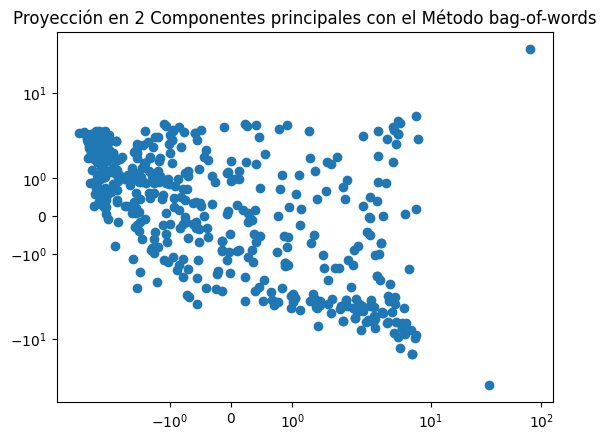

In [ ]:
# Graficamos Z1 vs Z2
plt.scatter(Z.Z1, Z.Z2)
plt.xscale('symlog') # log pero sin eliminar valores <= 0
plt.yscale('symlog')
plt.title('Proyección en 2 Componentes principales con el Método bag-of-words')

Al graficar las noticias deportivas usando palabras como si fueran números (cuántas veces aparece cada palabra), sin considerar ninguna importancia o "peso" de las mismas, vemos que casi todas las noticias terminan representadas como puntos muy juntos en un mismo cluster en una escala que no varia demasiado. Esto sugiere que son parecidas entre sí en su vocabulario, pero tenemos que pensar que muchas noticias repiten palabras iguales en todos los contextos (hoy, dia, respuesta, joven, dijo, etc.). Sin embargo, hay 2 noticias que se alejan mucho del resto y obligan a ver el grafico en escala logaritmica (outliers): esto puede deberse a que usan palabras raras o son muy distintas en longitud (muy cortas/muy largas). Esto significa que 2 autovalores no nos alcanzaron para diferenciar categorias. 

In [ ]:
# Varianza explicada por los primeros n autovalores
nComps = 2
print(autovalores[:nComps].sum() / sum(autovalores))

0.09975786971534385


Los primeros 2 autovalores solo explican el 10% de la varianza, lo que hace natural que no podamos diferenciar grupos en la proyección grafica

**Ejercicio 6**

In [ ]:
vectorizer_tfidf = TfidfVectorizer(analyzer=tokenize_and_stem, smooth_idf=False)
X = vectorizer_tfidf.fit_transform(df_sports["content"])
df_sports_tfidf = pd.DataFrame(X.toarray (), columns=vectorizer_tfidf.get_feature_names_out ())

,aaa,aac,aaron,abandon,abat,abbott,abc,abdomen,abdomin,abeb,...,zimbabw,zinc,zinedin,zoe,zola,zone,zornotza,zuluaga,zurich,zvonareva
0,0.090095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Opcional 1:**

In [10]:
stem = "abandon"

count_vect = CountVectorizer(analyzer=tokenize_and_stem)
X_counts = count_vect.fit_transform(df_sports["content"])
df_counts = pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names_out())

# Frecuencia de "abandon" en la noticia 246
frecuencia_abandon = df_counts.loc[246, stem] if stem in df_counts.columns else 0

# En cuántas noticias aparece "abandon"
docs_con_abandon = (df_counts[stem] > 0).sum() if stem in df_counts else 0

total_docs = len(df_counts)
idf = np.log(total_docs / docs_con_abandon) + 1

# TF-IDF sin normalizar
tfidf_sin_normalizar = frecuencia_abandon * idf

# Vemos cuanto peso tiene cada palabra de la noticia
noticia_246 = df_counts.loc[246]
tfidf_full_vector = np.array([
    frecuencia * (np.log(total_docs / (df_counts[word] > 0).sum()) + 1)
    if (df_counts[word] > 0).sum() > 0 else 0
    for word, frecuencia in noticia_246.items()
])

# Normalizamos
norma = np.linalg.norm(tfidf_full_vector)
tfidf_final = tfidf_sin_normalizar / norma if norma != 0 else 0

print(f"TF-IDF manual = {tfidf_final:.6f}")

TF-IDF manual = 0.204614


Comparamos con TFID vectorizer:

In [11]:
tfidf_vectorizado = df_sports_tfidf.loc[246, stem]
print(f"TF-IDF desde TfidfVectorizer = {tfidf_vectorizado:.6f}")

TF-IDF desde TfidfVectorizer = 0.204614


**Ejercicio 7**

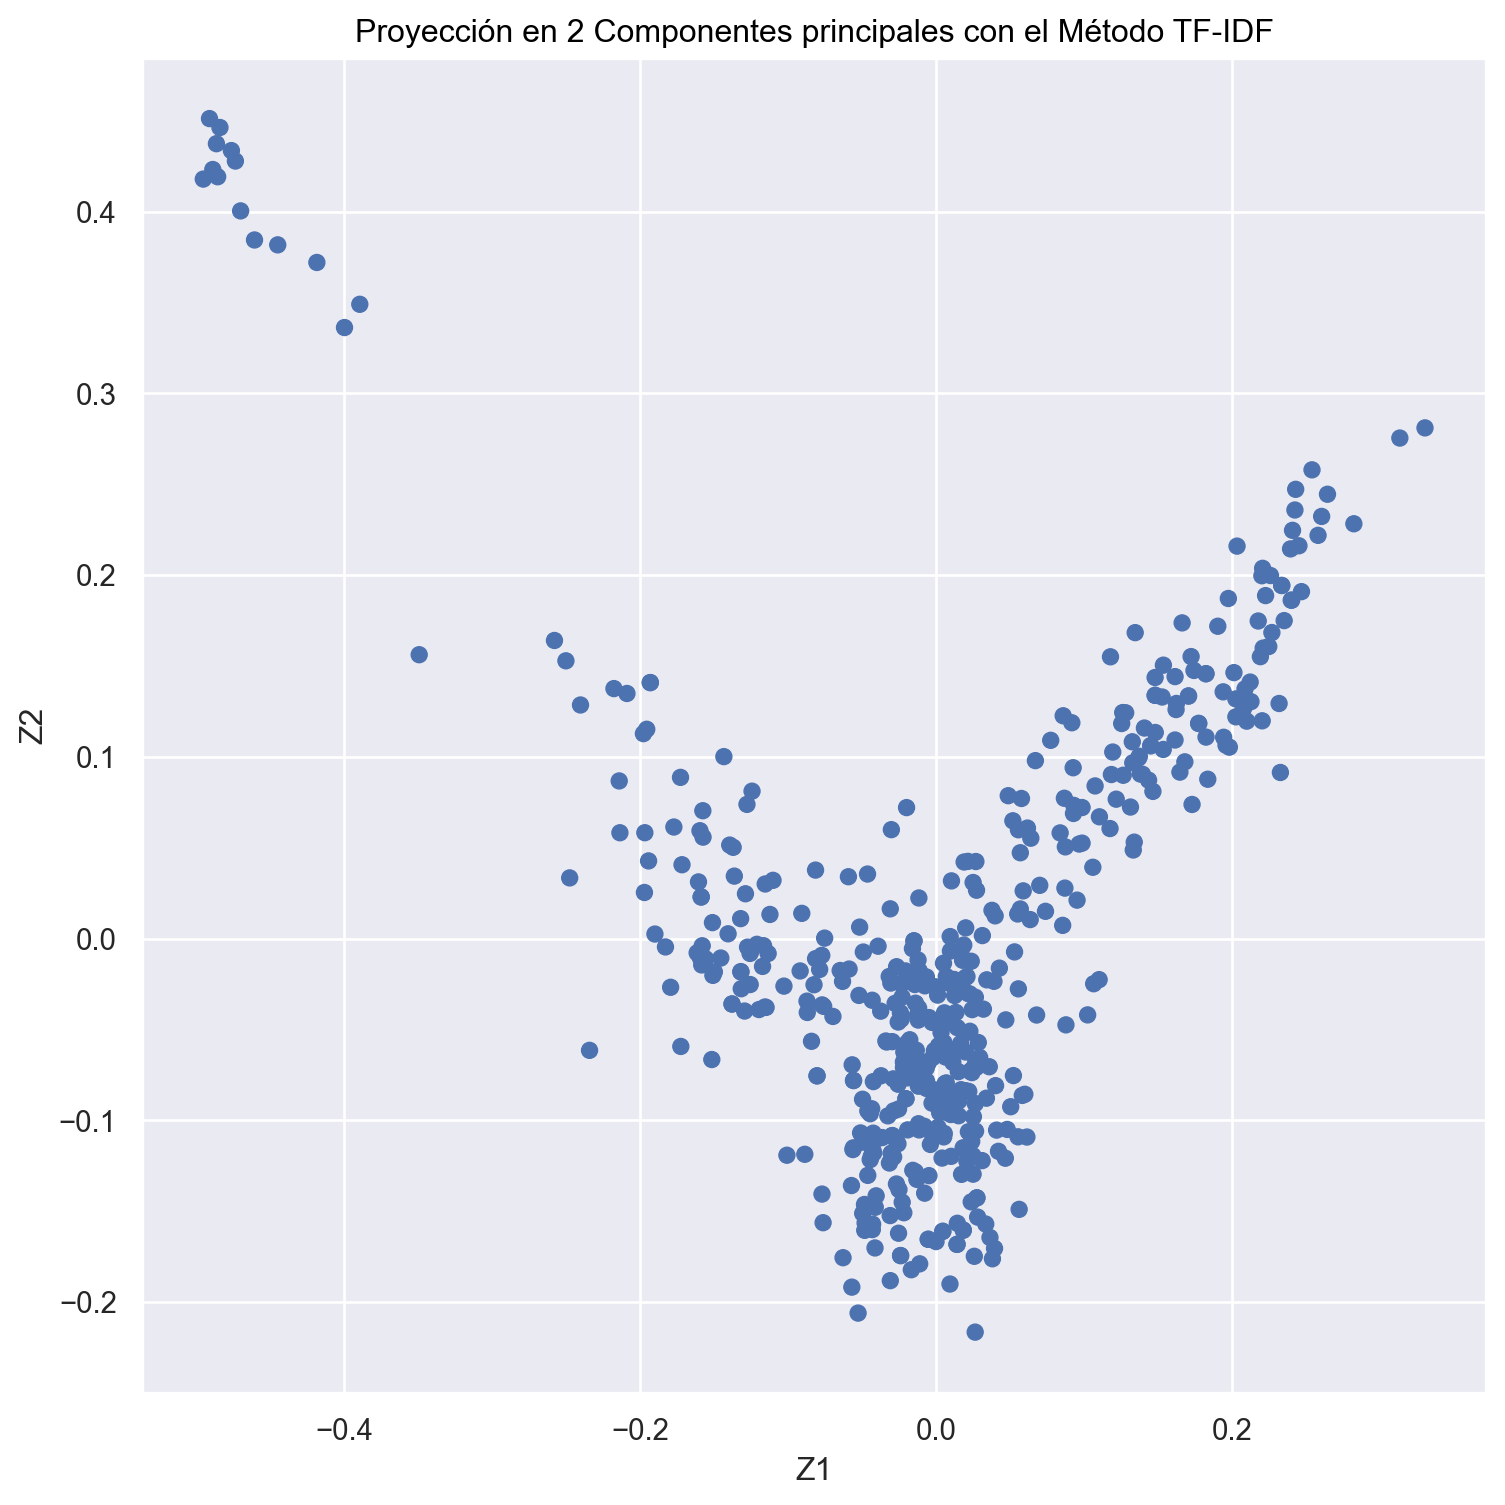

In [12]:
n=2

pca = PCA(n_components=n)
Z = pd.DataFrame(pca.fit_transform(df_sports_tfidf))
Z.columns = ["Z" + str(i) for i in range(1,n+1)]  # Renombramos las columnas

(
    so.Plot(Z, x="Z1", y="Z2")
    .add(so.Dot())
    .add(so.Text(valign="bottom"))
    .label(title="Proyección en 2 Componentes principales con el Método TF-IDF")
    .layout(size=(8,8))   # Conviene graficar en un cuadrado para ver correctamente las distancias 
)

 Como DBSCAN asume densidades relativamente uniformes, la presencia de un núcleo muy denso junto a grupos dispersos probablemente impida una buena separación. Si bien no parece que los posibles clusters vayan a tener una forma esferica e isotropica, Kmeans parece ser una mejor opcion de clustering en este caso.

**Ejercicios 8 y 9**

Primero, determinemos la cantidad de clusters con el metodo del "codo":

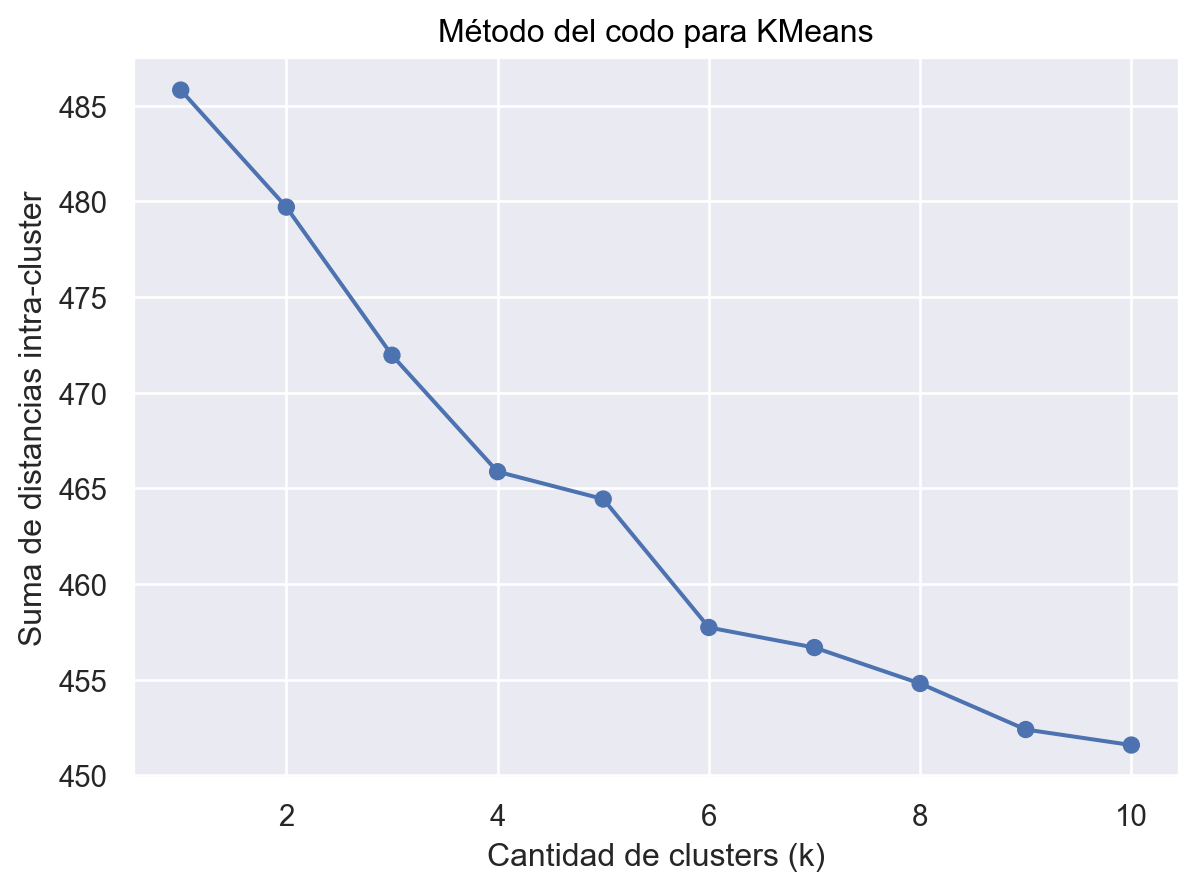

In [13]:
inertias = []
k_lista = list(range(1, 11))

for k in k_lista:
    modelo = KMeans(n_clusters=k, random_state=0)
    modelo.fit(df_sports_tfidf)
    inertias.append(modelo.inertia_)

# Graficamos
(
    so.Plot(x = k_lista, y = inertias)
    .add(so.Line())
    .add(so.Dot())
    .label(title="Método del codo para KMeans", x="Cantidad de clusters (k)", y="Suma de distancias intra-cluster")
)

Por los cambios de pendiente del Gráfico, el método nos da al 4 o al 6 como posibles candidatos a la cantidad de clusters. Probemos ambos valores para hacer una comparacion visual:

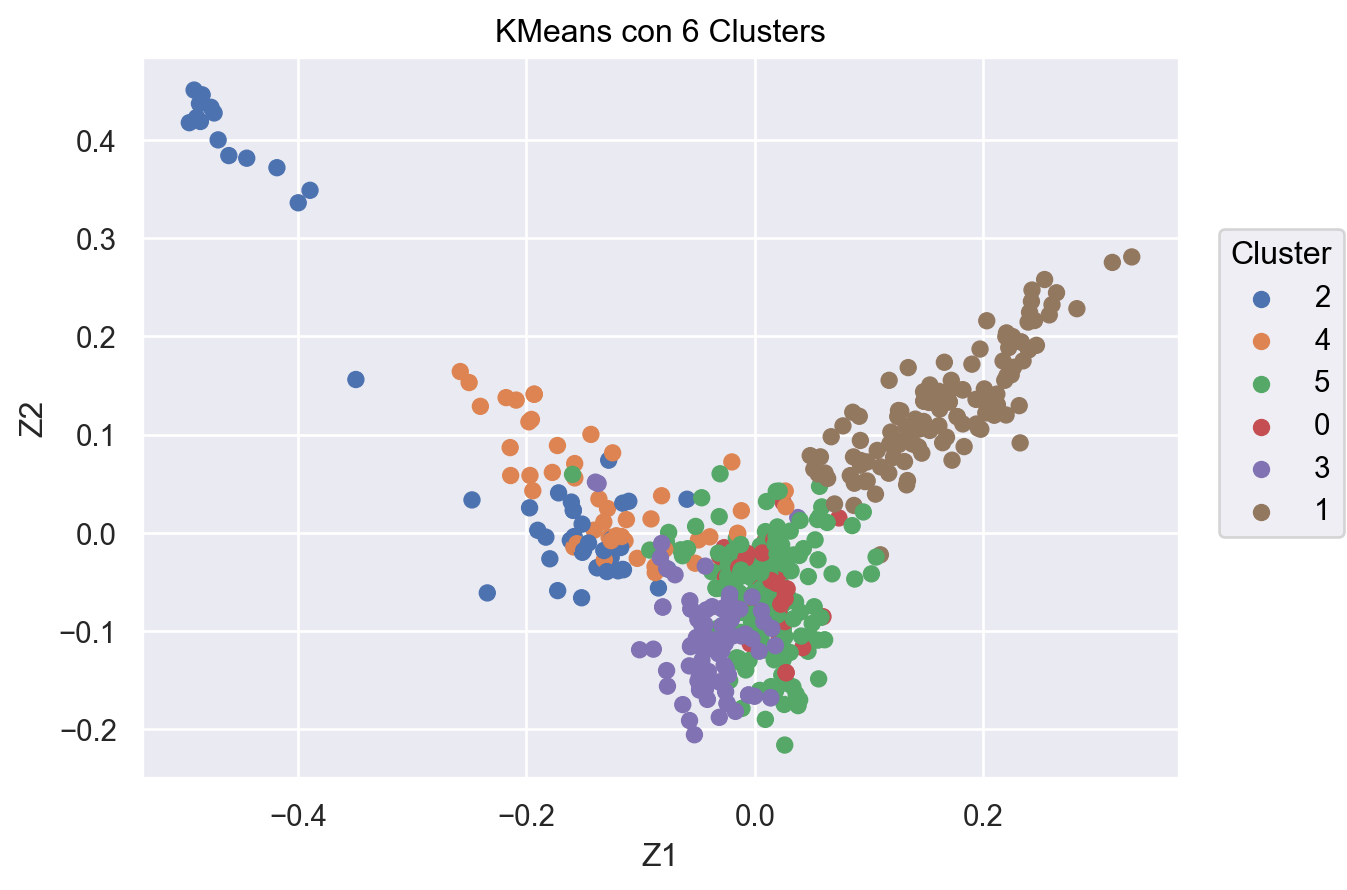

In [35]:
# KMeans con 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
etiquetas6 = kmeans.fit_predict(df_sports_tfidf)

Z6 = Z.copy()
Z6["cluster"] = etiquetas6.astype(str)

(
    so.Plot(Z6, x="Z1", y="Z2", color="cluster")
    .add(so.Dot())
    .label(title="KMeans con 6 Clusters", x="Z1", y="Z2", color="Cluster")
    .scale(color=so.Nominal())
    .plot()
)

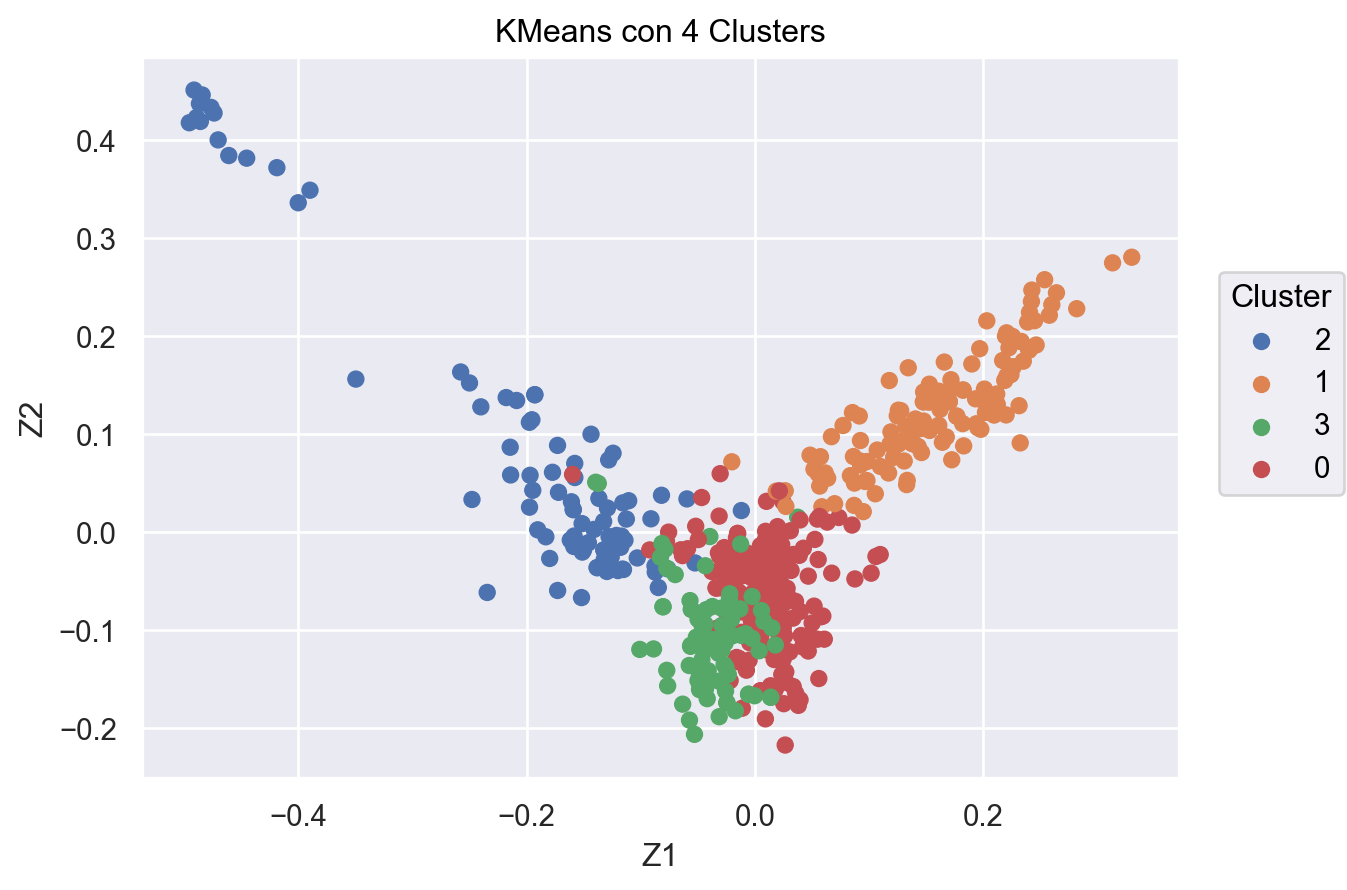

In [40]:
# KMeans con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
etiquetas4 = kmeans.fit_predict(df_sports_tfidf)

Z = pd.DataFrame(pca.fit_transform(df_sports_tfidf), columns=["Z1", "Z2"])
Z4 = Z.copy()
Z4["cluster"] = etiquetas4.astype(str)

(
    so.Plot(Z4, x="Z1", y="Z2", color="cluster")
    .add(so.Dot())
    .label(title="KMeans con 4 Clusters", x="Z1", y="Z2", color="Cluster")
    .scale(color=so.Nominal())
    .plot()
)

Comparado con la versión de 4 clusters, la división en 6 clusters separa el grupo que se extiende hacia valores negativos de Z1 y aísla unos pocos elementos cercanos al centro (0,0). Sin embargo, observando la proyección en las dos primeras componentes principales, estas subdivisiones no parecen representar grupos significativamente distintos respecto a su cluster original. Exceptuando unos pocos casos aislados en la rama negativa de Z1, los elementos en la clasificación con 4 clusters se mantienen cercanos entre sí y bien separados del resto, formando conjuntos visualmente disjuntos y compactos. Por lo tanto, optar por 4 clusters resulta más adecuado, ya que aporta una segmentación clara sin introducir divisiones forzadas ni artificiales.

**Ejercicio 10**

Vamos a acercar un poco el grafico a cada Cluster para poder leer mejor los indices

In [ ]:
# Cluster 0

ZCluster0 = Z[(etiquetas4==0)]
ZCluster0Centro = ZCluster0[
    (ZCluster0["Z2"] < 0) & (ZCluster0["Z2"] > -0.1) & 
    (ZCluster0["Z1"] > -0.04) & (ZCluster0["Z1"] < 0.04)
]

fig, ax =plt.subplots(1,2)  # Utilizamos este código para crear una grilla de dos gráficos.
fig.set_figwidth(12)

(
    so.Plot(ZCluster0, x="Z1", y="Z2", text=ZCluster0.index)
    .add(so.Dot())
    .add(so.Text(valign="bottom"))
    .label(title="Zoom en Cluster 0")
                                .on(ax[0]).plot()
)


(
    so.Plot(ZCluster0Centro, x="Z1", y="Z2", text=ZCluster0Centro.index)
    .add(so.Dot())
    .add(so.Text(valign="bottom"))
    .label(title="Zoom en Centro del Cluster 0")
                                .on(ax[1]).plot()
)

plt.show()

In [ ]:
display(df_sports.iloc[141]["content"])
display(df_sports.iloc[168:169])
display(df_sports.iloc[198]["content"])
display(df_sports.iloc[318:319])
display(df_sports.iloc[385]["content"])

print("Estas se ven en el Zoom")
display(df_sports.iloc[96:98])
display(df_sports.iloc[192:193])
display(df_sports.iloc[222:223])
display(df_sports.iloc[241:242])
display(df_sports.iloc[398]["content"])
display(df_sports.iloc[481:482])

Notamos que en su mayoria son de Futbol, pero también quedaron algunas (por ejemplo, las ultimas 2 que vimos) fuera de tema. La noticia numero 198 puede haber quedado lejos del resto en la Proyeccion por tener palabras relacionadas al escandalo de drogas de las primeras noticias del primer Cluster. De todas maneras, pudo ser correctamente identificada en el Cluster de Futbol

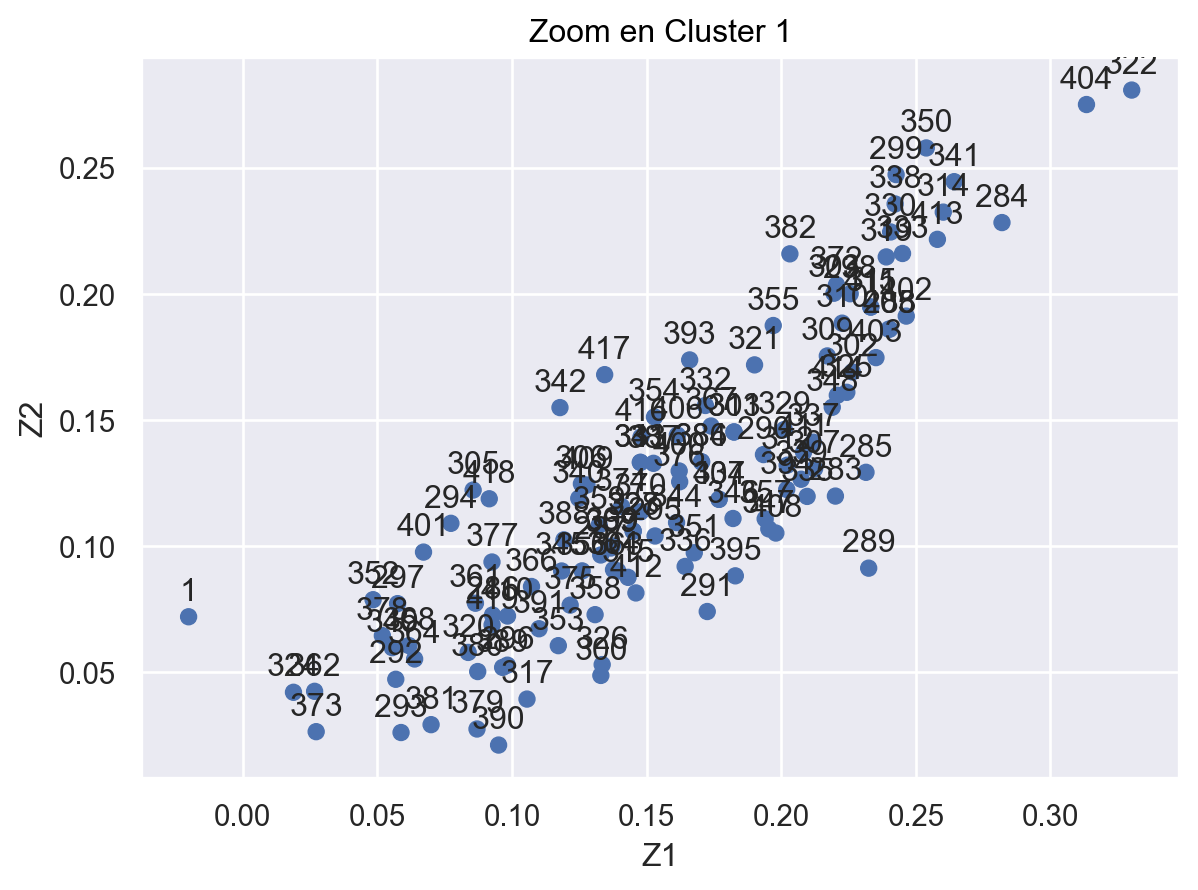

In [41]:
# Cluster 1

ZCluster1 = Z[(etiquetas4==1)]
(
so.Plot(ZCluster1, x="Z1", y="Z2", text=ZCluster1.index)
.add(so.Dot())
.add(so.Text(valign="bottom"))
.label(title="Zoom en Cluster 1")
)

In [ ]:
display(df_sports.iloc[1]["content"])
display(df_sports.iloc[283:286])
display(df_sports.iloc[284]["content"])
display(df_sports.iloc[291:293])
display(df_sports.iloc[309:311])
display(df_sports.iloc[314:315])
display(df_sports.iloc[322:323])
display(df_sports.iloc[404:405])

Las noticias estan enfocadas al rugby (principalmente la RBS Six Nations). Sin embargo, leyendo el contenido de la noticia numero 1 (la cual visualmente figura como zona de frontera), notamos que deberia estar en el Cluster 2 (analizado a continuacion) por escribir sobre el atletismo. Se puede haber filtrado por nombrar a paises que participan en el evento del Cluster actual.

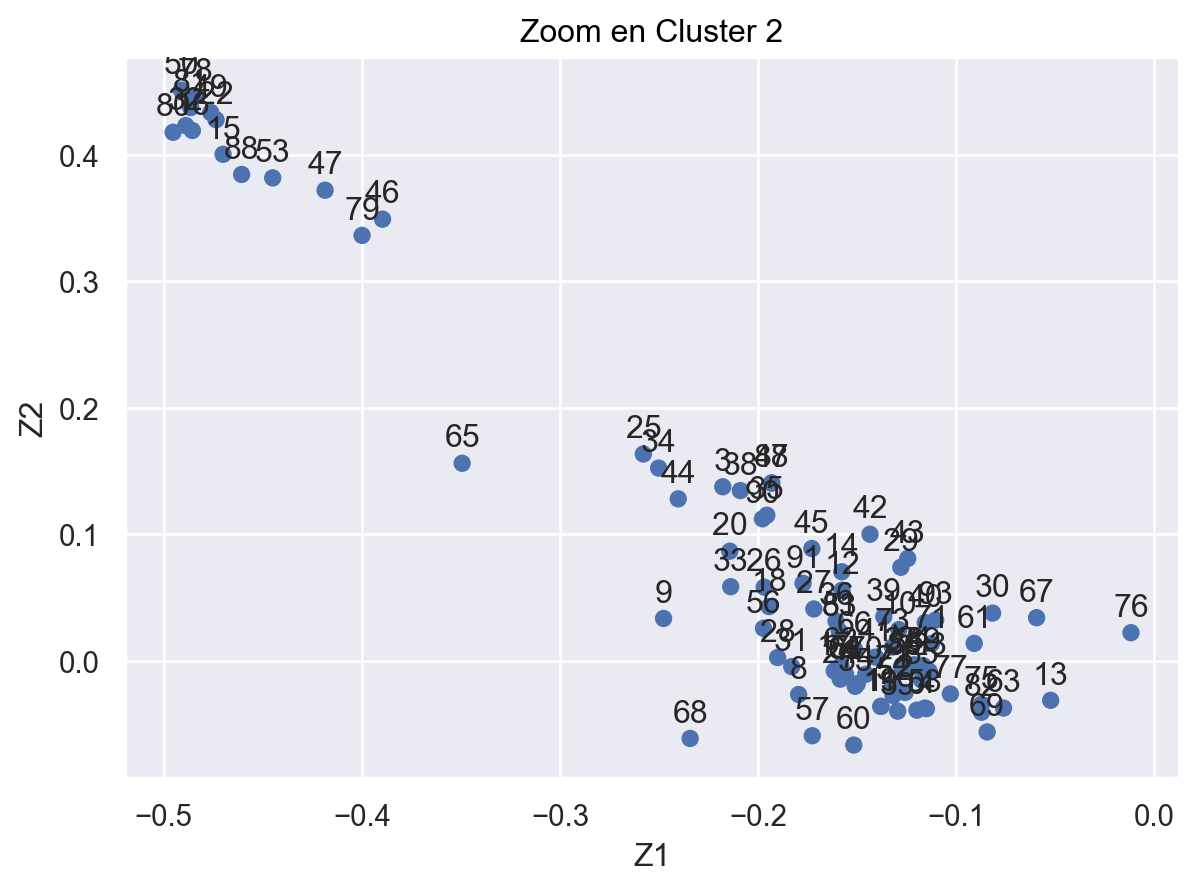

In [ ]:
# Cluster 2

ZCluster2 = Z[(etiquetas4==2)]
(
so.Plot(ZCluster2, x="Z1", y="Z2", text=ZCluster2.index)
.add(so.Dot())
.add(so.Text(valign="bottom"))
.label(title="Zoom en Cluster 2")
)

In [37]:
# Vemos el contenido de algunas

display(df_sports.iloc[9:10])
display(df_sports.iloc[25:26])
print("Verificamos que esten en el mismo Cluster:")
print(etiquetas4[9]==etiquetas4[25])
print("¿Tambien quedaban juntas en la division por 6 Clusters?:")
print(etiquetas6[9]==etiquetas6[25])

print("\n Sigamos viendo Noticias del Cluster:")
display(df_sports.iloc[42:43])
display(df_sports.iloc[46:48])
display(df_sports.iloc[65:66])
display(df_sports.iloc[68]["content"])
display(df_sports.iloc[76]["content"])
display(df_sports.iloc[88:89])


,title,content,category
9,Collins to compete in Birmingham,World and Commonwealth 100m champion Kim Colli...,sport


,title,content,category
25,Collins appeals against drugs ban,Sprinter Michelle Collins has lodged an appeal...,sport


Verificamos que esten en el mismo Cluster:
True
¿Tambien quedaban juntas en la division por 6 Clusters?:
False

 Sigamos viendo Noticias del Cluster:


,title,content,category
42,Collins named UK Athletics chief,UK Athletics has ended its search for a new pe...,sport


,title,content,category
46,Kenteris denies faking road crash,Greek sprinter Kostas Kenteris has denied clai...,sport
47,Greek pair set for hearing,Kostas Kenteris and Katerina Thanou will fight...,sport


,title,content,category
65,Britain boosted by Holmes double,Athletics fans endured a year of mixed emotion...,sport


'Double Olympic champion Kelly Holmes was back to her best as she comfortably won the 1,000m at the Norwich Union Birmingham Indoor Grand Prix.\n \n The 34-year-old, running only her second competitive race of the season, shook off the rust to win in two minutes, 35.39 seconds. But she is still undecided about competing in the European Championships in Madrid from 4-6 March. "I\'ll probably be entered and make my mind up at the last minute," she said. "My training hasn\'t gone as well as expected but I\'ve got two weeks to decide. "I need to take my time and make sure I feel good about what I\'m doing. "I felt very good here but with the crowd behind you, you feel like you can do anything." American\n \n was the eventual winner of the men\'s 60m race which almost ended in farce. Three athletes were disqualified for false starting, including Britain\'s Mark Lewis-Francis, who was the first man guilty of coming out of his blocks too quickly. World 100m champion Kim Collins clinched secon

"European cross-country champion Hayley Yelling completed a hat-trick of wins in the Reebok Cardiff Cross Challenge in Bute Park on Sunday afternoon.\n \n The part-time maths teacher beat Irish international Jolene Byrne by 40 metres in the six-kilometre race. Another Great Britain international, Louise Damen, finished third as part of the contingent representing England. Peter Riley, who secured bronze for the GB men's team at last month's European Championships, won the men's 9km race. Riley, representing England, moved away over the last two kilometres to win by 25 metres from Ireland's Gary Murray. Glynn Tromans - the reigning UK Inter-Countries and England Cross-Country champion - came in third place as he continues his comeback from a five-month injury lay-off.\n"

,title,content,category
88,Thanou desperate to make return,Greek sprinter Katerina Thanou says she is eag...,sport


Son todas noticias de atletismo. También confirmamos que quedarse con 4 Clusters fue la decision correcta, con 6 Clusters tendriamos 2 separados pero con una misma tematica

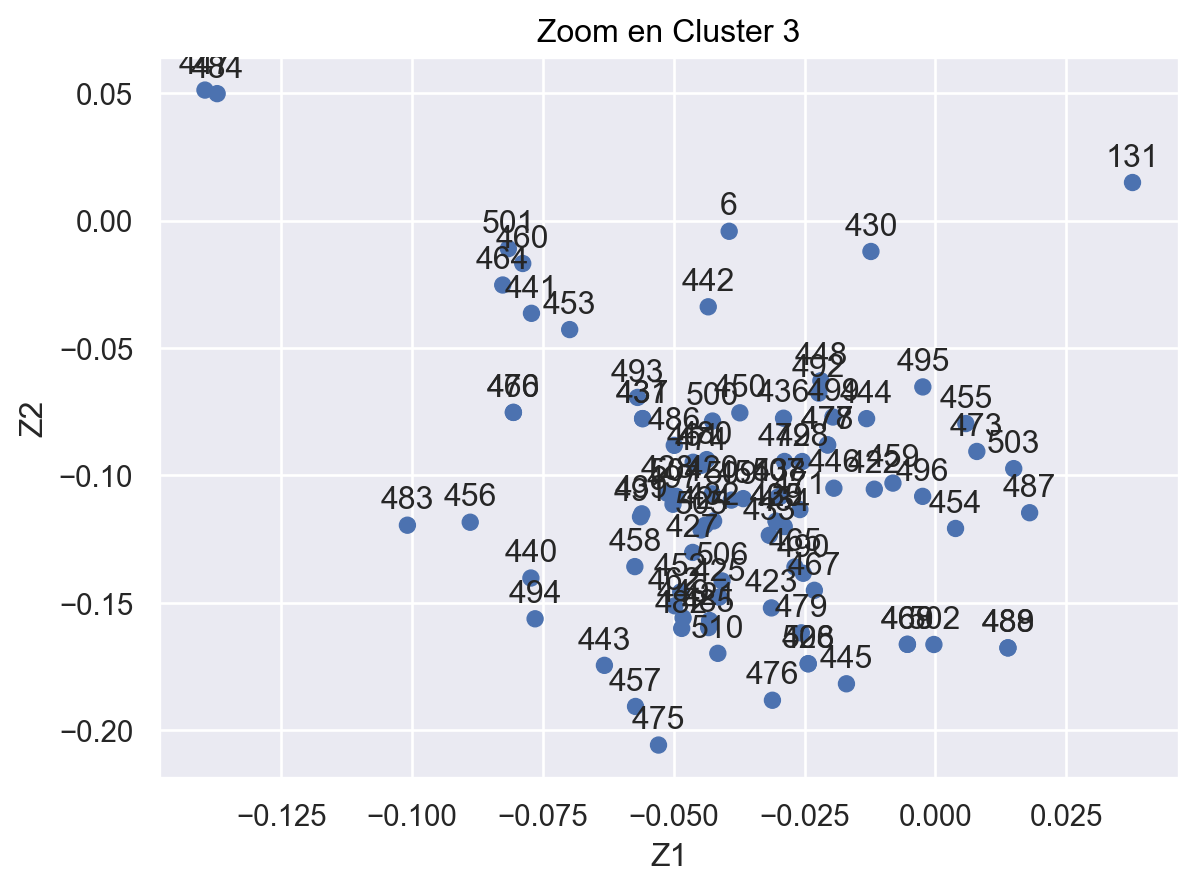

In [22]:
# Cluster 3

ZCluster3 = Z[(etiquetas4==3)]
(
so.Plot(ZCluster3, x="Z1", y="Z2", text=ZCluster3.index)
.add(so.Dot())
.add(so.Text(valign="bottom"))
.label(title="Zoom en Cluster 3")
)

In [23]:
display(df_sports.iloc[6]["content"])
display(df_sports.iloc[131]["content"])
display(df_sports.iloc[440:441])
display(df_sports.iloc[456]["content"])
display(df_sports.iloc[475:477])
display(df_sports.iloc[493:495])

print("Estas se ven en la esquina superior izquierda")
display(df_sports.iloc[447:448])
display(df_sports.iloc[484:485])

'Sonia O\'Sullivan will seek to regain her title at the Bupa Great Ireland Run on 9 April in Dublin.\n \n The 35-year-old was beaten into fourth at last year\'s event, having won it a year earlier. "I understand she\'s had a solid winter\'s training down in Australia after recovering from a minor injury," said race director Matthew Turnbull. Mark Carroll, Irish record holder at 3km, 5km and 10km, will make his debut in the mass participation 10km race. Carroll has stepped up his form in recent weeks and in late January scored an impressive 3,000m victory over leading American Alan Webb in Boston. Carroll will be facing stiff competition from Australian Craig Mottram, winner in Dublin for the last two years.\n'

'The Republic of Ireland have arranged friendlies against China and Italy which will take place at Lansdowne Road in March and August.\n \n Brian Kerr\'s side will face the 54th ranked Chinese on 29 March - just three days after the World Cup qualifier against Israel in Tel Aviv. Italy will visit on 17 August in what will be a warm-up game ahead of the autumn World Cup qualifiers. In their last meeting, the Irish beat Italy in the 1994 World Cup Finals. However, that is the Republic\'s only victory in eight attempts against the Italians who have won all the other seven games. The 29 March game will be the second time the Republic have played China - the previous encounter back in June 1984 with the Irish winning 1-0 in Sapporo, Japan. Brian Kerr said: "China have made great progress over the last few years and will provide difficult opposition. "We all witnessed the performances of the Asian teams in the last World Cup, and China play a similar type of football. "As for Italy, they mak

,title,content,category
440,Serena becomes world number two,Serena Williams has moved up five places to se...,sport


"Mark Philippoussis withdrew from the Sydney International tennis tournament as expected on Sunday after suffering a groin injury during the Hopman Cup.\n \n His participation in the Australian Open, which begins on 17 January in Melbourne, also remains in doubt. Defending women's champion Justine Henin-Hardenne is also out of the Sydney event because of a knee injury. In the only main draw men's or women's singles match on Sunday, Nathalie Dechy beat American Lisa Raymond 7-5 6-3. Number one men's seed Lleyton Hewitt begins his quest for a fourth Sydney title on Tuesday when he plays Karol Beck. Lindsay Davenport, top seed in the women's draw, has been handed a first-round bye and plays France's Dechy in the second round on Tuesday.\n"

,title,content,category
475,Henman to face Saulnier test,British number one Tim Henman will face France...,sport
476,Moya suffers shock loss,Fifth seed Carlos Moya was the first big name ...,sport


,title,content,category
493,Roche 'turns down Federer offer',Australian tennis coach Tony Roche has turned ...,sport
494,Federer joins all-time greats,The last year has seen one player dominate men...,sport


Estas se ven en la esquina superior izquierda


,title,content,category
447,Kuznetsova 'failed a drugs test',US Open champion Svetlana Kuznetsova has teste...,sport


,title,content,category
484,Koubek suspended after drugs test,Stefan Koubek says he has been banned for thre...,sport


Son noticias de Tenis (exceptuando el primer par que vimos). Nuevamente, las ultimas 2 noticias pueden haber quedado lejos del resto en la Proyeccion por tener palabras relacionadas al escandalo de drogas, pero fueron correctamente clasificadas en el Cluster

Ahora como confirmación veamos las palabras mas importantes por cluster:

In [24]:
df_clusters = df_sports.copy()
df_clusters["CLUSTER"] = etiquetas4

k_real = len(np.unique(etiquetas4))
centroids = kmeans.cluster_centers_
feature_names = vectorizer.get_feature_names_out()

for i in range(k_real):
    top_indices = np.argsort(centroids[i])[-10:][::-1]
    palabras_importantes = [feature_names[j] for j in top_indices]
    print(f"\nCluster {i} - Palabras principales: {', '.join(palabras_importantes)}")


Cluster 0 - Palabras principales: v, unit, southampton, club, manag, tottenham, redknapp, home, said, forest

Cluster 1 - Palabras principales: england, wale, ireland, rugbi, nation, franc, robinson, six, game, side

Cluster 2 - Palabras principales: olymp, indoor, kenteri, athlet, athen, thanou, holm, greek, iaaf, european

Cluster 3 - Palabras principales: open, seed, australian, play, set, roddick, match, said, beat, win


Recordemos que habiamos puesto al 0 como Futbol, al 1 como RBS (rugby), al 2 como Atletismo y al 3 como Tenis. Todas las clasificaciones quedaron coherentes con el analisis de palabras mas comunes

## CLASIFICACION

**Ejercicio 11:**

In [42]:
X = vectorizer_tfidf.fit_transform(df_news["content"])
df_news_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
df_news_tfidf.head()

,aa,aaa,aac,aadc,aaliyah,aaltra,aamir,aara,aarhus,aaron,...,zoom,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zuton,zvonareva,zvyagintsev
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Ejercicio 12:**

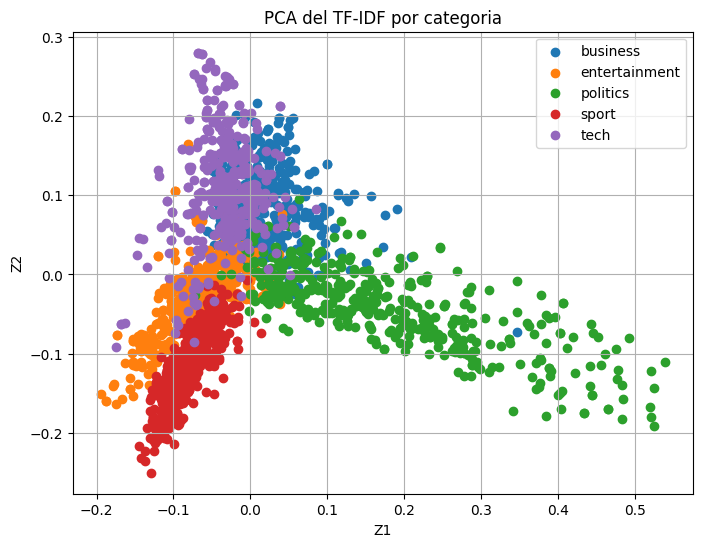

In [26]:
pca = PCA(n_components=2)
Z = pca.fit_transform(df_news_tfidf)
df_Z = pd.DataFrame(Z, columns=["Z1", "Z2"])
df_Z["category"] = df_news["category"]

plt.figure(figsize=(8,6))
for categoria in df_Z["category"].unique():
    df_cat = df_Z[df_Z["category"] == categoria]
    plt.scatter(df_cat["Z1"], df_cat["Z2"], label=categoria)
plt.xlabel("Z1")
plt.ylabel("Z2")
plt.title("PCA del TF-IDF por categoria")
plt.legend()
plt.grid(True)
plt.show()

Se observa que algunas categorías como politics y sport tienden a agruparse de forma clara, mientras que otras como business, tech y entertainment presentan una mayor superposición.

Esto sugiere que el contenido textual distingue bien ciertas temáticas específicas, pero no todas, al menos cuando se proyectan sobre las dos primeras componentes principales.
Sin embargo, es posible que categorías como business y entertainment compartan un vocabulario general similar, lo cual dificulta su separación.

**Opcional 2:**

In [ ]:
componentes = pca.components_
palabras = df_news_tfidf.columns

for i, comp in enumerate(componentes):
    print(f"\nComponente Principal {i+1}:")

    mas_pos = np.argsort(comp)[-10:][::-1]
    mas_neg = np.argsort(comp)[:10]

    palabras_pos = [palabras[j] for j in mas_pos]
    palabras_neg = [palabras[j] for j in mas_neg]

    print("Palabras con mayor peso POSITIVO:")
    print(", ".join(palabras_pos))

    print("Palabras con mayor peso NEGATIVO:")
    print(", ".join(palabras_neg))


Componente Principal 1:
Palabras con mayor peso POSITIVO:
mr, labour, elect, parti, blair, tax, brown, tori, govern, minist
Palabras con mayor peso NEGATIVO:
game, film, award, best, play, player, star, music, england, win

Componente Principal 2:
Palabras con mayor peso POSITIVO:
mobil, phone, firm, market, technolog, growth, compani, use, servic, user
Palabras con mayor peso NEGATIVO:
win, england, play, best, labour, game, blair, elect, award, wale


**Ejercicio 13:**

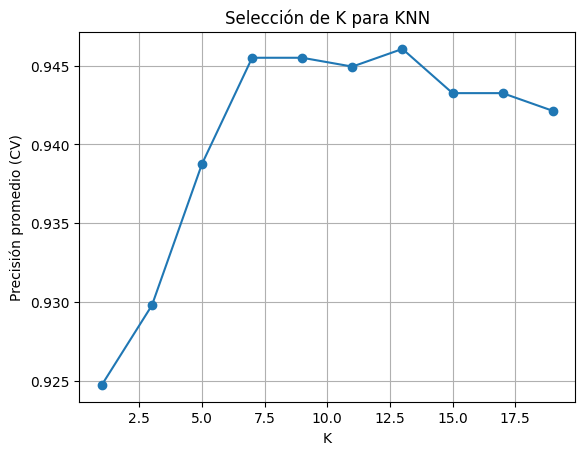

Precisión del KNN con k=13: 0.9528


In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_news_tfidf, df_news["category"], test_size=0.2, random_state=0)

valores_k = list(range(1, 20, 2))
scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=5).mean() for k in valores_k]

plt.plot(valores_k, scores, 'o-')
plt.xlabel("K")
plt.ylabel("Precisión promedio (CV)")
plt.title("Selección de K para KNN")
plt.grid(True)
plt.show()

mejor_k = valores_k[scores.index(max(scores))]
modelo_knn = KNeighborsClassifier(n_neighbors=mejor_k)
modelo_knn.fit(X_train, y_train)
y_pred = modelo_knn.predict(X_test)
accuracy_knn = (y_pred == y_test).mean()
print(f"Precisión del KNN con k={mejor_k}: {accuracy_knn:.4f}")

**Opcional 3:**

Componentes necesarias para explicar al menos el 10% de la varianza: 18


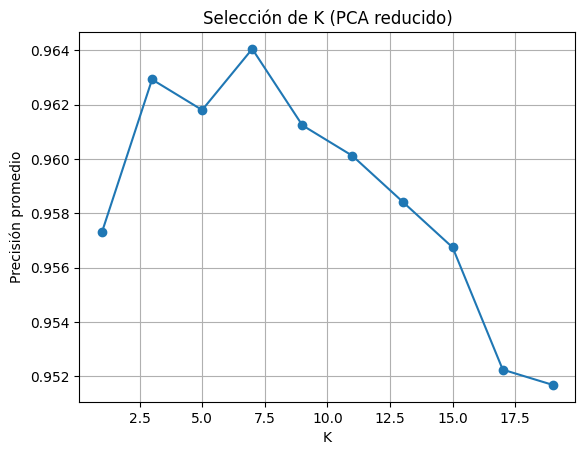

Precisión con PCA reducido (k=7): 0.9528


In [29]:
pca_total = PCA()
Z = pca_total.fit_transform(df_news_tfidf)

# Ver proporción de varianza explicada
varianza_acumulada = np.cumsum(pca_total.explained_variance_ratio_)
num_componentes = np.argmax(varianza_acumulada >= 0.10) + 1

print(f"Componentes necesarias para explicar al menos el 10% de la varianza: {num_componentes}")

# Reducimos el dataset a esas componentes
Z = pd.DataFrame(Z[:, :num_componentes])

X_train, X_test, y_train, y_test = train_test_split(Z, df_news["category"], test_size=0.2, random_state=0)

valores_k = list(range(1, 20, 2))
precisiones = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=5).mean() for k in valores_k]

# Graficamos
plt.plot(valores_k, precisiones, 'o-')
plt.xlabel("K")
plt.ylabel("Precisión promedio")
plt.title("Selección de K (PCA reducido)")
plt.grid(True)
plt.show()

k_optimo = valores_k[np.argmax(precisiones)]
modelo_pca = KNeighborsClassifier(n_neighbors=k_optimo)
modelo_pca.fit(X_train, y_train)
precision_pca = modelo_pca.score(X_test, y_test)

print(f"Precisión con PCA reducido (k={k_optimo}): {precision_pca:.4f}")

## CLASIFICACION UTILIZANDO TITULOS DE LAS NOTICIAS

**Ejercicio 14:**

In [30]:
vectorizador = TfidfVectorizer(stop_words='english')
X_titulos = vectorizador.fit_transform(df_news["title"])

df_titulos_tfidf = pd.DataFrame(X_titulos.toarray(), columns=vectorizador.get_feature_names_out())

df_titulos_tfidf.head()

,000,000m,05,10,100,100m,102,10bn,11,110,...,york,young,youngsters,youssou,youth,yukos,zambia,zealand,zeros,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.345019,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


**Opcional 4:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_titulos_tfidf, df_news["category"], test_size=0.2, random_state=0)

# Exploramos valores impares de K del 1 al 19
valores_k = list(range(1, 20, 2))
puntajes_validacion = [
    cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=5).mean()
    for k in valores_k
]

# Graficamos
plt.plot(valores_k, puntajes_validacion, 'o-')
plt.xlabel("K")
plt.ylabel("Precisión promedio (CV)")
plt.title("Selección de K para KNN (títulos)")
plt.grid(True)
plt.show()

# Elegimos el mejor K y evaluamos
mejor_k = valores_k[puntajes_validacion.index(max(puntajes_validacion))]
modelo_knn_titulos = KNeighborsClassifier(n_neighbors=mejor_k)
modelo_knn_titulos.fit(X_train, y_train)
precision_titulos = modelo_knn_titulos.score(X_test, y_test)

print(f"Precisión usando solo los títulos (k={mejor_k}): {precision_titulos:.4f}")

**Ejercicio 15:**

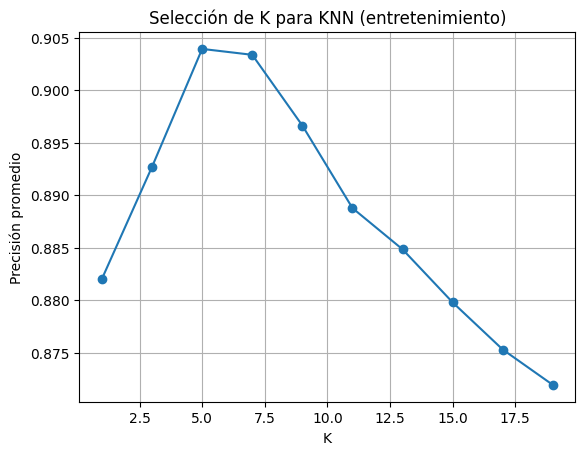

Precisión para 'entretenimiento' con KNN (k=5): 0.9191


In [31]:
y_ent = df_news["category"] == "entertainment"
X_train, X_test, y_train, y_test = train_test_split(df_titulos_tfidf, y_ent, test_size=0.2, random_state=0)

valores_k = list(range(1, 20, 2))
scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=5).mean() for k in valores_k]

plt.plot(valores_k, scores, 'o-')
plt.xlabel("K")
plt.ylabel("Precisión promedio")
plt.title("Selección de K para KNN (entretenimiento)")
plt.grid(True)
plt.show()

k_ent = valores_k[scores.index(max(scores))]
modelo_ent = KNeighborsClassifier(n_neighbors=k_ent)
modelo_ent.fit(X_train, y_train)
acc_ent = modelo_ent.score(X_test, y_test)
print(f"Precisión para 'entretenimiento' con KNN (k={k_ent}): {acc_ent:.4f}")

**Ejercicio 16 y 17:**

Probemos con regresión logística:

In [32]:
modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train, y_train)

predicciones_log = modelo_log.predict(X_test)

aciertos_log = (predicciones_log == y_test).mean()
print(f"Precisión regresión logística: {aciertos_log:.4f}")

Precisión regresión logística: 0.8539


Ahora, con una red neuronal:

In [33]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), activation="logistic", max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

y_pred_nn = mlp.predict(X_test)
acc_nn = (y_pred_nn == y_test).mean()
print(f"Precisión de la red neuronal: {acc_nn:.4f}")

Precisión de la red neuronal: 0.9303


KNN: 91.91%
Regresión logística: 85.39%
Redes Neuronales: 93.03%
  
KNN no intenta entender el significado profundo de cada título. En lugar de eso, cuando ve una noticia nueva, la compara directamente con otras noticias que ya conoce. Si encuentra varios títulos parecidos que son de entretenimiento, asume que el nuevo también lo es. En este caso funciona bastante bien porque muchos títulos de noticias de entretenimiento en general son cortos y usan palabras claves parecidas como “movie”, “actor”, “show”, etc.

En cambio, la regresión logística intenta buscar una “fórmula”/“regla general” que separe los títulos de una categoría de los de otra. Esto puede ser más difícil cuando los títulos son muy variados, usan diferentes formas de decir lo mismo, o contienen palabras que no son muy específicas.

Redes neuronales aprende patrones más complejos y combina distintas palabras para entender mejor a qué categoría pertenece un título, asi que se adapta mejor cuando hay relaciones no tan evidentes entre las palabras y las categorías (por eso tiene tanta diferencia con Regresion Logistica).

En resumen, KNN se adapta mejor cuando las noticias tienen títulos cortos y directos, ya que puede simplemente buscar otras noticias similares y copiar su categoría. La regresión logística es buena también, pero al intentar aplicar una regla fija a títulos muy variados, pierde precisión. Redes neuronales puede entender relaciones más complejas y por ende fue el que mejor clasificó en este caso (teniendo en cuenta que en las noticias suelen usarse titulos con jergas, juegos de palabras o relacionados a cosas que los "fans" entienden).